# Random Walk (of a virus ?)

This code was created by Guilherme Vieira (@guilhermewells/sechat.blog for the youtube channel https://www.youtube.com/user/guilhermewellsful).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation
import mpl_toolkits.mplot3d.axes3d as p3

Following table 9.5 of Seinfel & Pandis, considering a particle $10^{-7}$ diameter aerosol with relaxation time or order $10^{-8}$ and mean free path or order $10^{-8}$ we get that for a $10^{-2}$ walk-step we have about a $10^{-2}$ time-step.

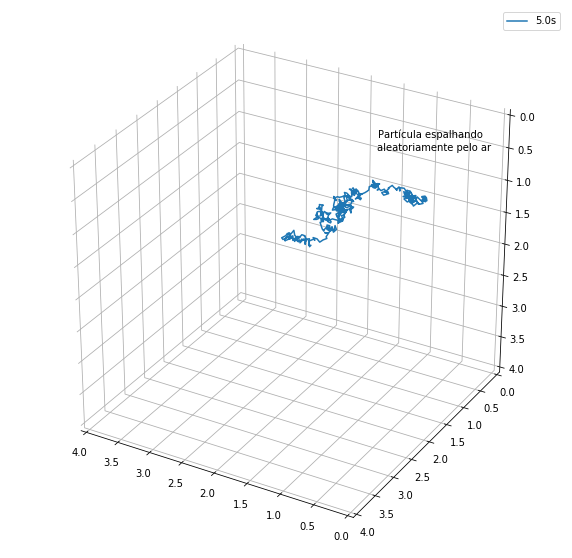

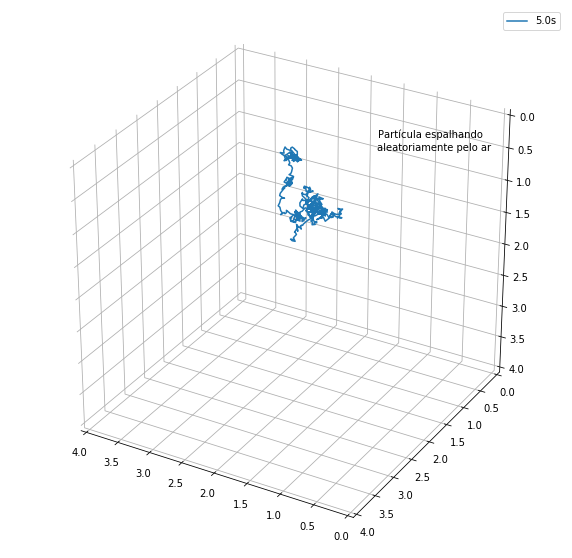

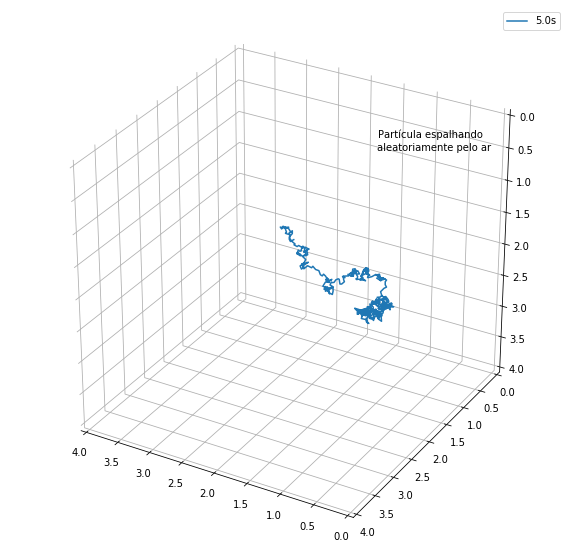

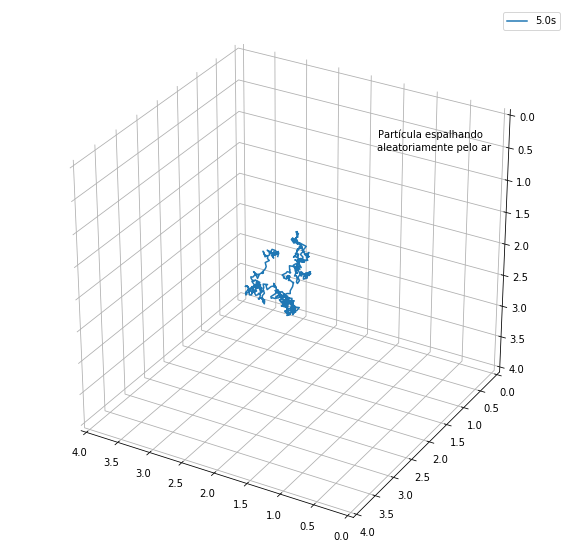

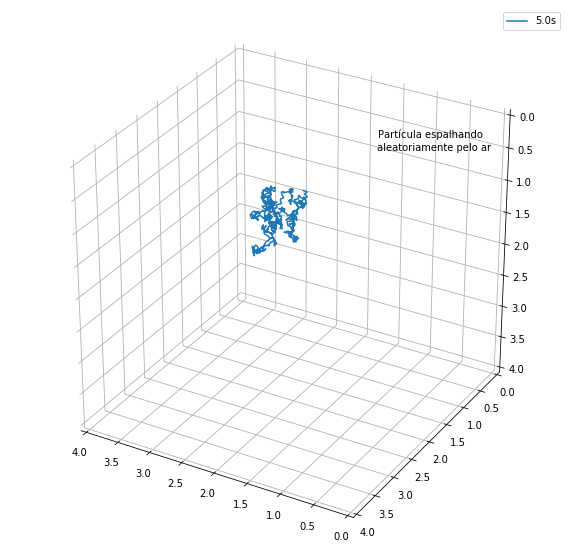

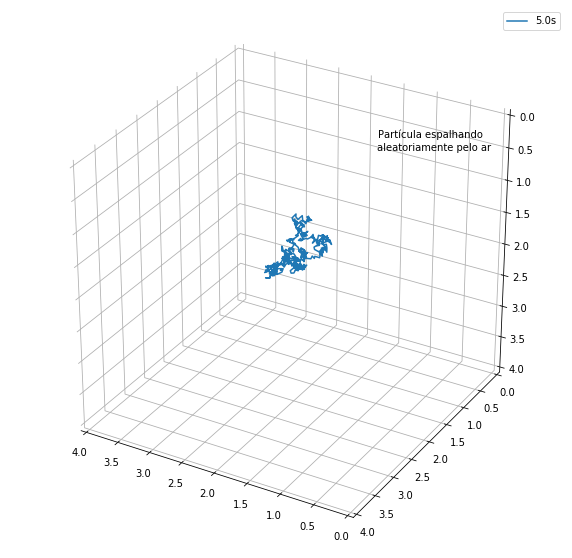

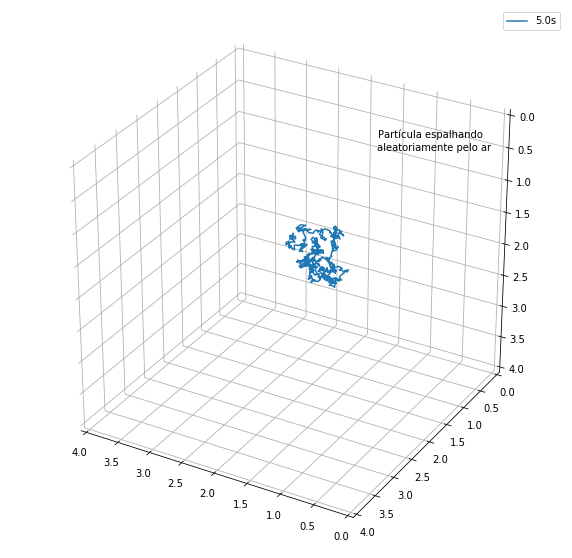

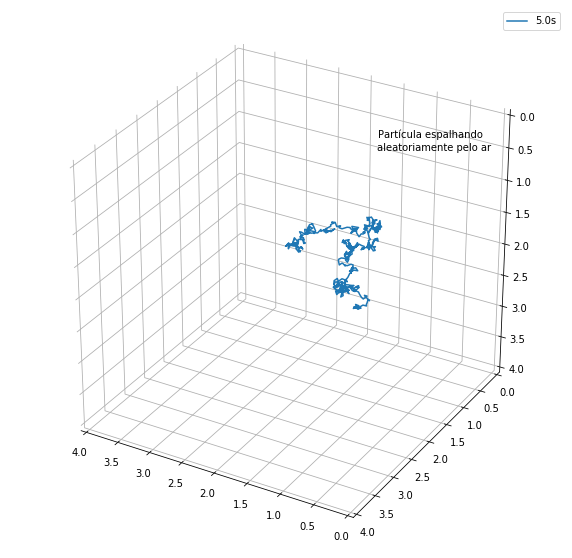

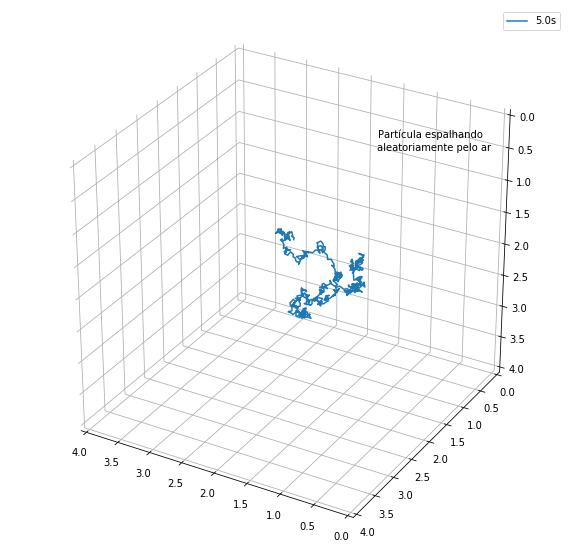

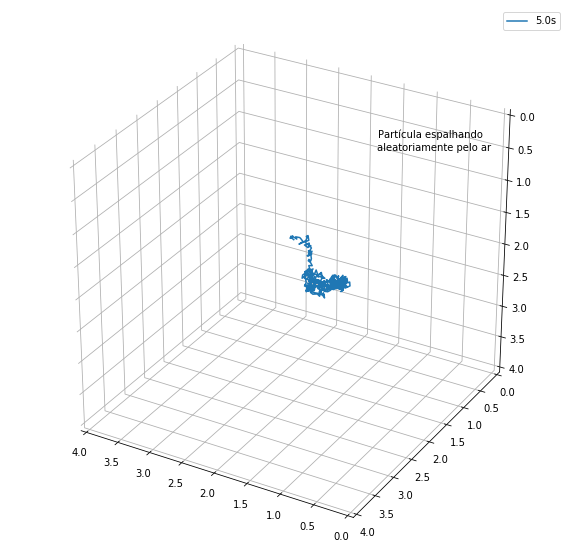

Distância radial quadrática média 0.6260288522936803


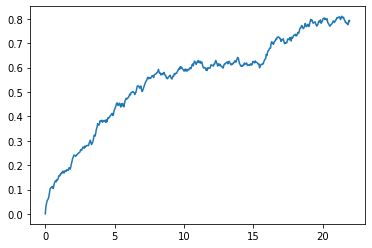

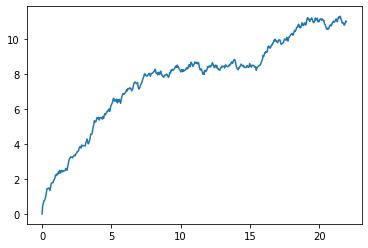

In [5]:
#randomwalk

pas = 500
K = int(np.sqrt(pas))
R = np.zeros((K, pas+1))
Rsqtnm = np.zeros((K, pas+1))

# loop for each walk
for u in range(10):
    
    x = []
    y = []
    z = []
    
    aa = 0
    bb = 0
    cc = 0
    
    Rxna = []
    Ryna = []
    Rzna = []
    Rsqtn = []
    Rsqn = []
    t = 0
    #initial values for a walk
    a = 2
    b = 2
    c = 1.5
    
    for j in range(pas + 1): #realiza uma caminhada completa
                        
        aa += a
        bb += b
        cc += c
        x.append(aa)
        y.append(bb)
        z.append(cc)
        
        #dist de cada caminhada de acordo com passo
            
        Rxn = (np.diff(x))
        Rxna.append(Rxn) #acumula p/ cada passo a distância em x
        Ryn = (np.diff(y))
        Ryna.append(Ryn) #acumula p/ cada passo a distância em y
        Rzn = (np.diff(z))
        Rzna.append(Rzn) #acumula p/ cada passo a distância em z
        
        Rsqn = (np.sum(Rxn))**2 + (np.sum(Ryn))**2 + (np.sum(Rzn))**2
        Rsqtn.append(Rsqn) #acumula p/ cada passo sua distância quadrática
        Rn = np.sqrt(Rsqtn) #acumula p/ cada passo sua distância
        
        a = (np.random.rand() - 0.5)/10
        b = (np.random.rand() - 0.5)/10
        c = (np.random.rand() - 0.5)/10 
        
        #2Dplot
        #plt.plot(x,y,'-', markersize='0.05')
        #plt.xlim(-50, 50)
        #plt.ylim(-50, 50)
        #plt.show() 
    
    #3Dplot
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    ax.set_xlim(4, 0)
    ax.set_ylim(4, 0)
    ax.set_zlim(4, 0)
           
    ax.xaxis.set_pane_color((1.0,1.0,1.0,0.0))
    ax.yaxis.set_pane_color((1.0,1.0,1.0,0.0))
    ax.zaxis.set_pane_color((1.0,1.0,1.0,0.0))
    ax.plot(x,y,z, label= str(j/100) + 's')
    ax.text(1.2,1.2,0.1, 'Partícula espalhando')
    ax.text(1.2,1.2,0.3, 'aleatoriamente pelo ar')
    ax.legend()
    plt.show() 
            
    #dist de cada caminhada
    
    R[u][:] = [w for w in Rn]    
    Rsqtnm[u][:] = [q for q in Rsqtn]  

Rt = np.sum(R, axis = 0) # a soma das distâncias quadráticas por passo para cada caminhada
Rsqtnmm = np.sum(Rsqtnm, axis = 0) # a soma das distâncias quadráticas por passo para cada caminhada
#print(R,Rsqtnmm)    
     
#distância quad média
print('Distância radial quadrática média', Rsqtnmm[-1]/K)

caminhadas = np.arange(0,K,K/len(Rsqtnmm))

plt.plot(caminhadas,np.sqrt(Rsqtnmm/K))
plt.show()

plt.plot(caminhadas,Rt)
plt.show()

